In [1]:
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from operator import itemgetter

In [2]:
pairings = pd.read_csv('pairings.csv')

In [3]:
for index in range(len(pairings)):
    if (pd.isna(pairings.iloc[index]['from']) or pd.isna(pairings.iloc[index]['to'])):
        pairings.iloc[index, 1] = -1
    elif len(pairings.iloc[index]['from'].split()) < 2 or  len(pairings.iloc[index]['to'].split()) < 2:
            pairings.iloc[index, 1] = -1

In [4]:
multiplier = 1 / 250

small_pairings = pairings.sort_values('times', ascending=False)[:100]
small_pairings['times'] *= multiplier

G = nx.from_pandas_edgelist(small_pairings, 'from', 'to', ['times'])

G_biggest_component = G.subgraph(next(nx.connected_components(G))) 

In [5]:
edges_biggest_component = G_biggest_component.edges()
width_biggest_component = [G[u][v]['times'] for u,v in edges_biggest_component]

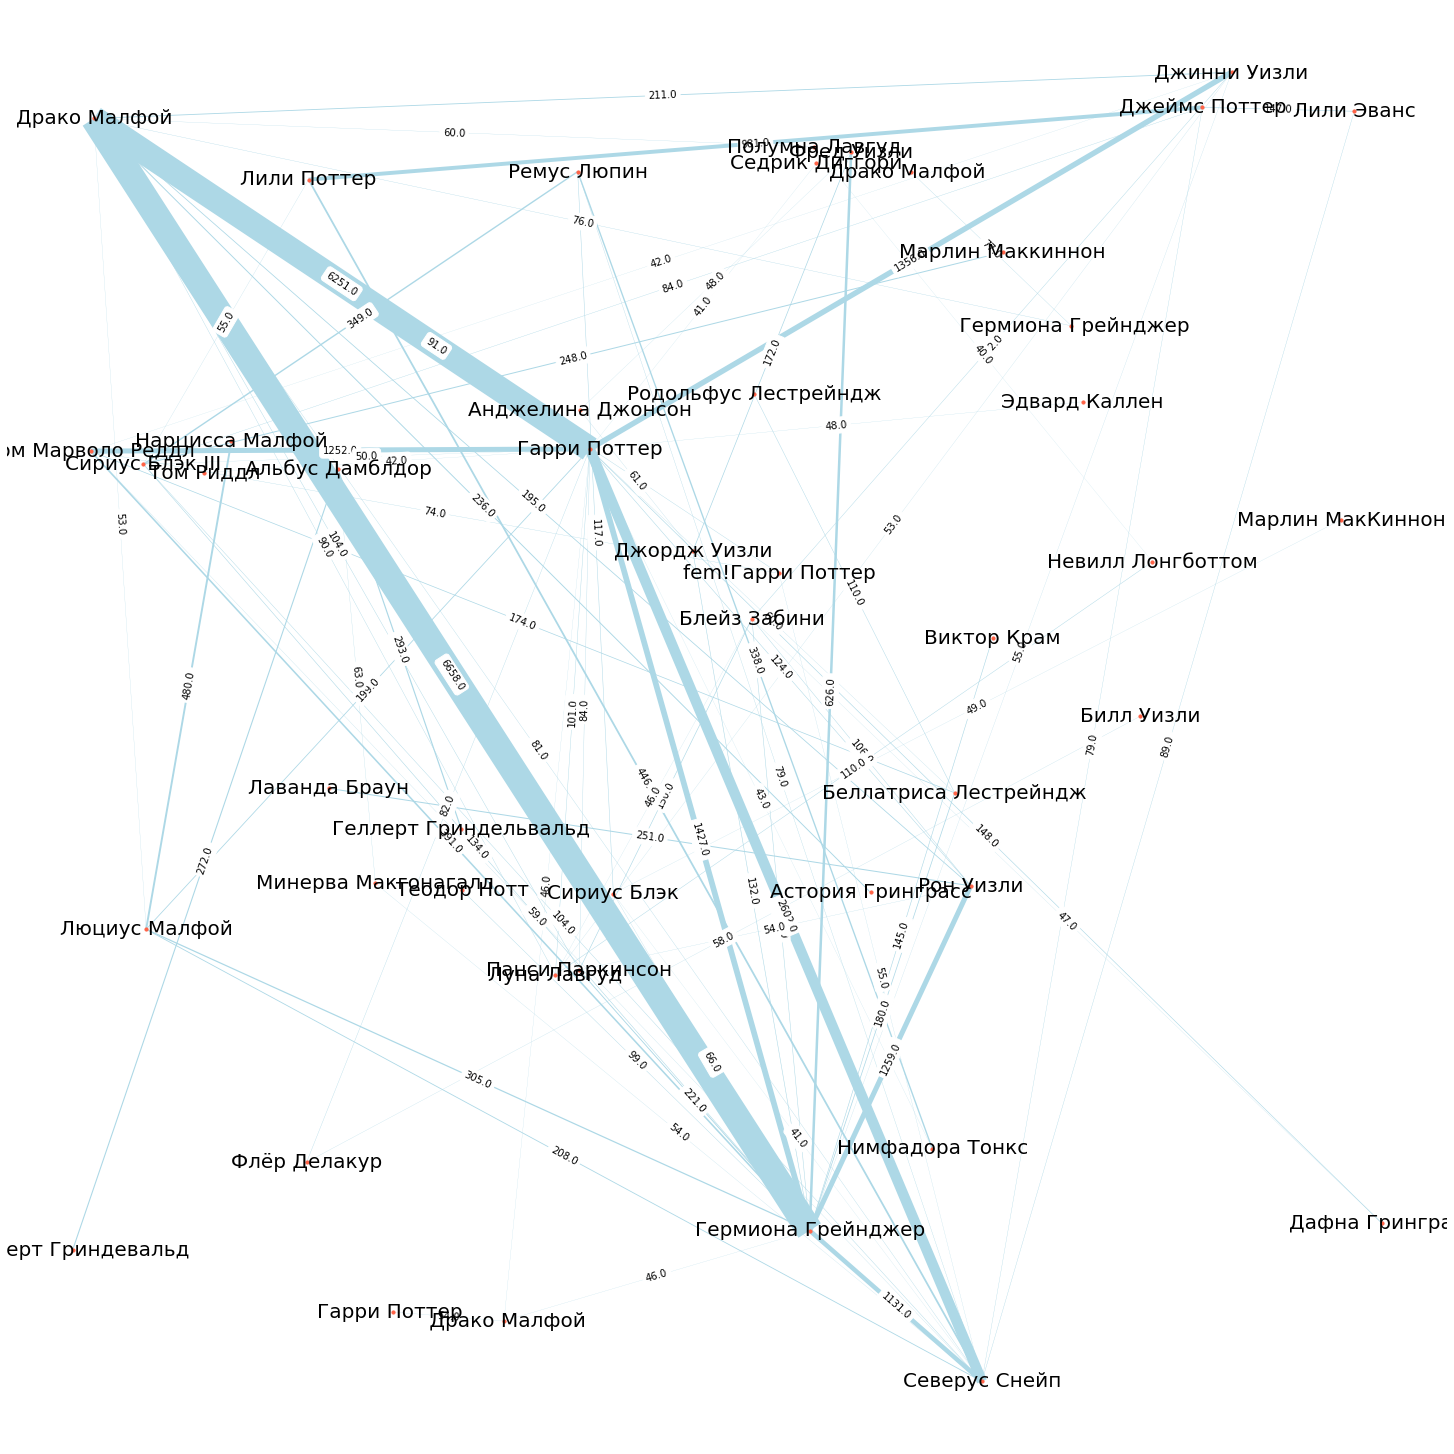

In [6]:
plt.figure(figsize=(20, 20))
pos = nx.random_layout(G_biggest_component,)

nx.draw(
    G_biggest_component, 
    with_labels=True, 
    width=width_biggest_component, 
    node_size=10,
    node_color="tomato",
    font_color="black",
    edge_color="lightblue",
    pos=pos,
    font_size=20
)

edge_labels = nx.get_edge_attributes(G_biggest_component,'times')

formatted_edge_labels = {(elem[0], elem[1]) : edge_labels[elem] / multiplier for elem in edge_labels}

nx.draw_networkx_edge_labels(G, pos, edge_labels = formatted_edge_labels)

plt.show()

In [12]:
big_pairings = pairings.sort_values('times', ascending=False)[:1000]
big_pairings['times'] *= multiplier

G_big = nx.from_pandas_edgelist(big_pairings, 'from', 'to', ['times'])

hub_ego = nx.ego_graph(G_big, 'Драко Малфой', radius=1)

edges = hub_ego.edges()
width = [hub_ego[u][v]['times'] for u,v in edges]

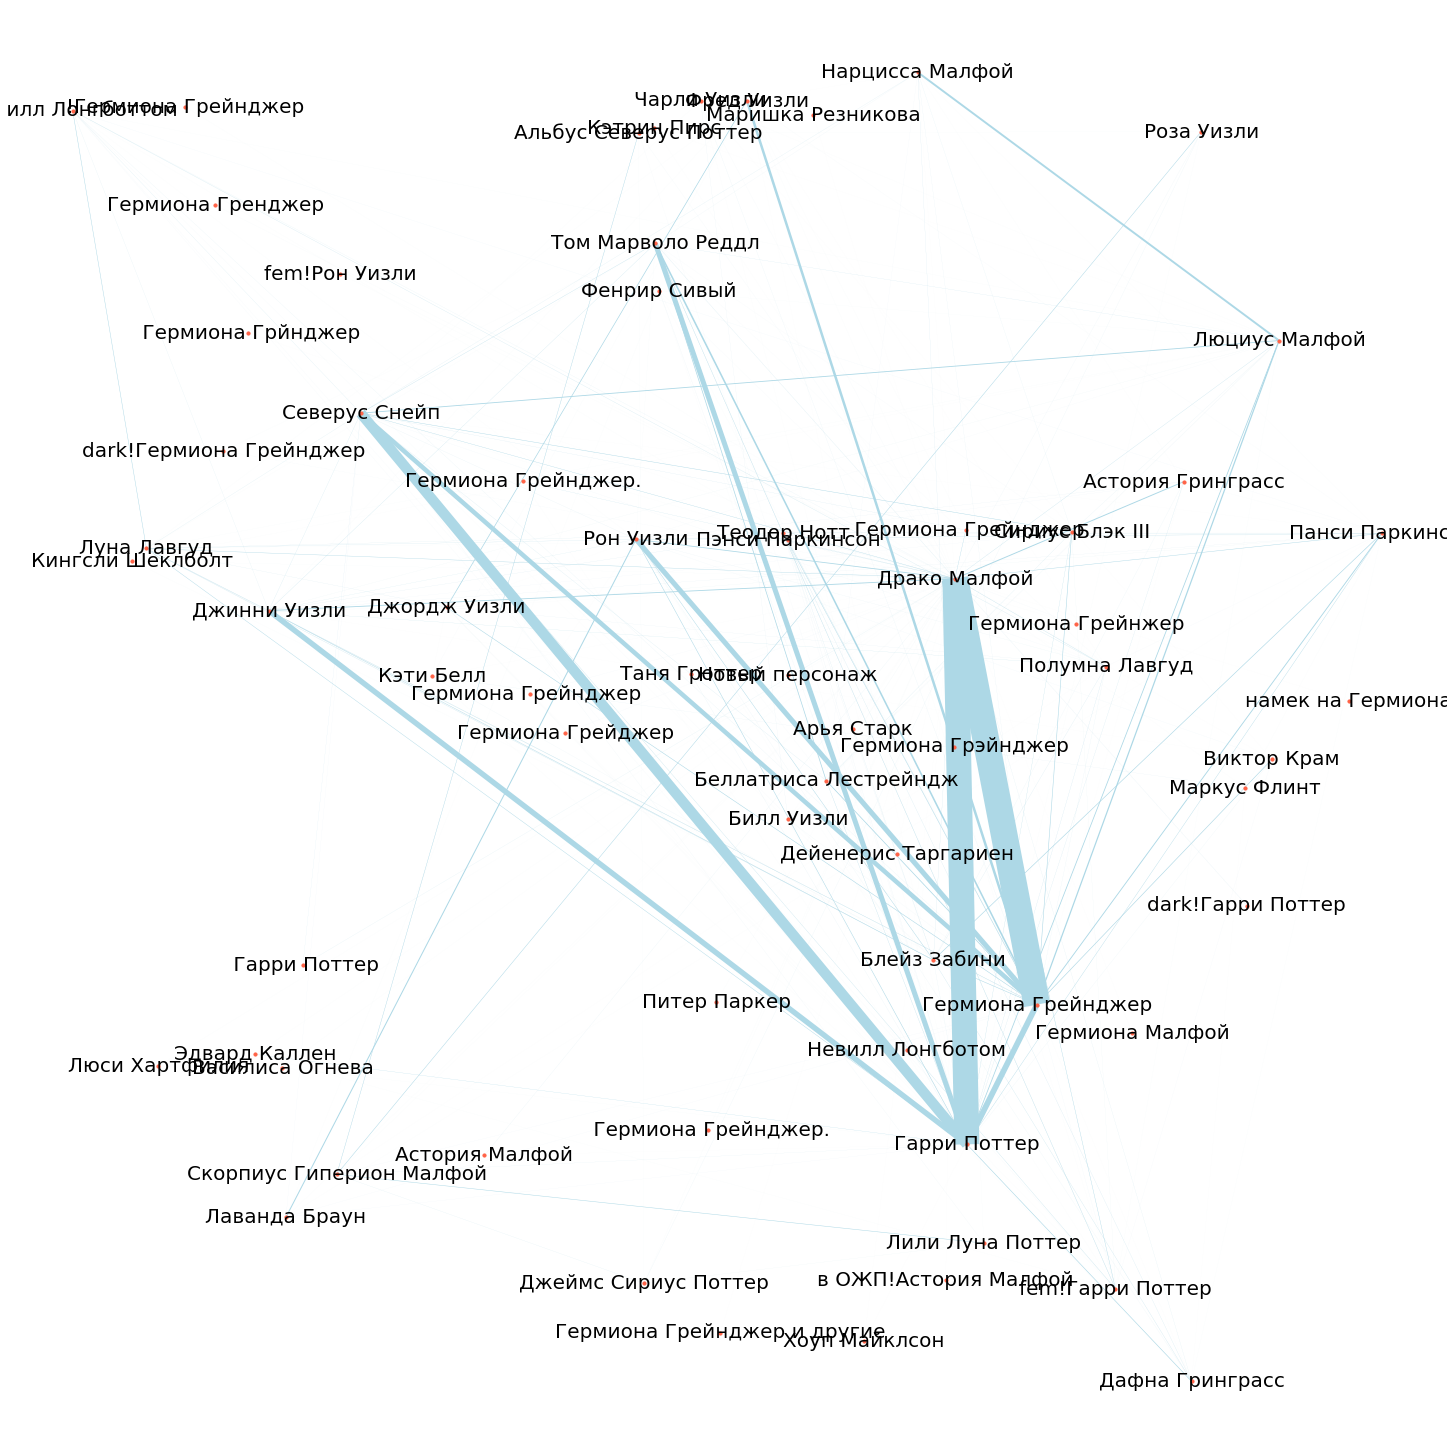

In [15]:
plt.figure(figsize=(20, 20))
pos = nx.random_layout(hub_ego)

nx.draw(
    hub_ego, 
    with_labels=True, 
    width=width, 
    node_size=10,
    node_color="tomato",
    font_color="black",
    edge_color="lightblue",
    pos=pos,
    font_size=20
)

plt.show()